In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [4]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

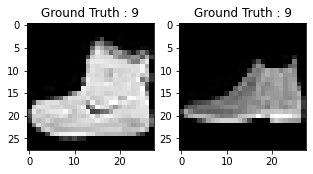

In [5]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [6]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [8]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [10]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [11]:
"""
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
"""

'\nmodel = keras.Sequential(\n    [\n        keras.Input(shape=input_shape),\n        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),\n        layers.MaxPooling2D(pool_size=(2, 2)),\n        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),\n        layers.MaxPooling2D(pool_size=(2, 2)),\n        layers.Flatten(),\n        layers.Dropout(0.5),\n        layers.Dense(num_classes, activation="softmax"),\n    ]\n)\n'

In [12]:
from tensorflow.keras.models import Sequential #,Input, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers.advanced_activations import LeakyReLU

In [13]:
batch_size = 64 #=64
epochs = 13
num_classes = 10

In [14]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
#fashion_model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(28,28,1),padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
#fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [15]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [16]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [17]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/13
750/750 [==============================] - 89s 117ms/step - loss: 0.6963 - accuracy: 0.7453 - val_loss: 0.3373 - val_accuracy: 0.8807
Epoch 2/13
750/750 [==============================] - 87s 116ms/step - loss: 0.3072 - accuracy: 0.8901 - val_loss: 0.2785 - val_accuracy: 0.8985
Epoch 3/13
750/750 [==============================] - 86s 115ms/step - loss: 0.2491 - accuracy: 0.9092 - val_loss: 0.2594 - val_accuracy: 0.9040
Epoch 4/13
750/750 [==============================] - 86s 115ms/step - loss: 0.2172 - accuracy: 0.9201 - val_loss: 0.2490 - val_accuracy: 0.9112
Epoch 5/13
750/750 [==============================] - 86s 115ms/step - loss: 0.1908 - accuracy: 0.9297 - val_loss: 0.2520 - val_accuracy: 0.9094
Epoch 6/13
750/750 [==============================] - 86s 114ms/step - loss: 0.1653 - accuracy: 0.9384 - val_loss: 0.2388 - val_accuracy: 0.9135
Epoch 7/13
750/750 [==============================] - 86s 114ms/step - loss: 0.1435 - accuracy: 0.9461 - val_loss: 0.2265 - val_ac

In [18]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.32792967557907104
Test accuracy: 0.9129999876022339


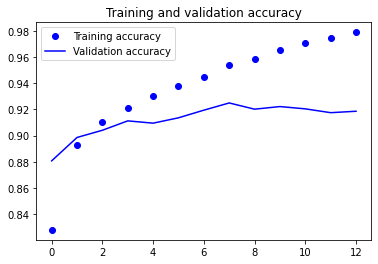

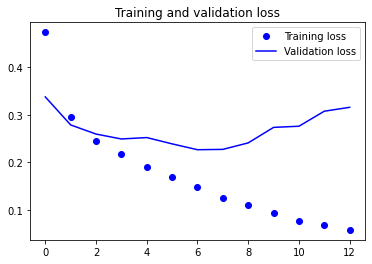

In [19]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [20]:
fashion_model.save("fashion_model_Nodropout.py")

INFO:tensorflow:Assets written to: fashion_model_Nodropout.py/assets


In [21]:
batch_size = 64
epochs = 13
num_classes = 10

In [22]:
fashion_model2 = Sequential()
fashion_model2.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D((2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.25))
fashion_model2.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model2.add(Dropout(0.4))
fashion_model2.add(Flatten())
fashion_model2.add(Dense(128, activation='linear'))
#fashion_model2.add(LeakyReLU(alpha=0.1))
fashion_model.add(Activation('relu'))
fashion_model2.add(Dropout(0.3))
fashion_model2.add(Dense(num_classes, activation='softmax'))

In [23]:
fashion_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [24]:
fashion_model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [25]:
fashion_train_dropout = fashion_model2.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/13
750/750 [==============================] - 89s 118ms/step - loss: 0.7609 - accuracy: 0.7224 - val_loss: 0.3746 - val_accuracy: 0.8695
Epoch 2/13
750/750 [==============================] - 88s 117ms/step - loss: 0.4052 - accuracy: 0.8579 - val_loss: 0.3326 - val_accuracy: 0.8815
Epoch 3/13
750/750 [==============================] - 89s 119ms/step - loss: 0.3451 - accuracy: 0.8752 - val_loss: 0.3071 - val_accuracy: 0.8924
Epoch 4/13
750/750 [==============================] - 88s 117ms/step - loss: 0.3189 - accuracy: 0.8868 - val_loss: 0.2843 - val_accuracy: 0.8986
Epoch 5/13
750/750 [==============================] - 88s 117ms/step - loss: 0.3127 - accuracy: 0.8877 - val_loss: 0.2774 - val_accuracy: 0.9016
Epoch 6/13
750/750 [==============================] - 88s 117ms/step - loss: 0.2982 - accuracy: 0.8887 - val_loss: 0.2832 - val_accuracy: 0.8986
Epoch 7/13
750/750 [==============================] - 88s 118ms/step - loss: 0.2862 - accuracy: 0.8959 - val_loss: 0.2612 - val_ac

In [26]:
fashion_model2.save("fashion_model_dropout.py")

INFO:tensorflow:Assets written to: fashion_model_dropout.py/assets


In [27]:
test_eval = fashion_model2.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.2698 - accuracy: 0.9093
Test loss: 0.2698086202144623
Test accuracy: 0.9093000292778015


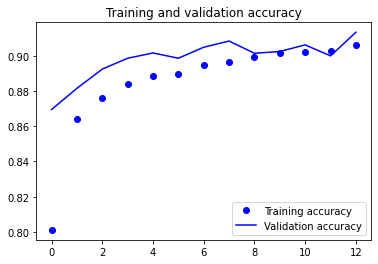

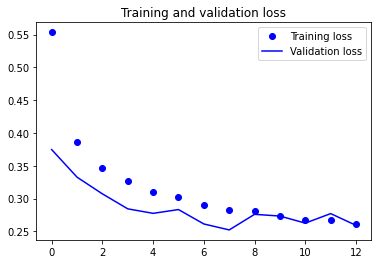

In [28]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
predicted_classes = fashion_model2.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9045 correct labels


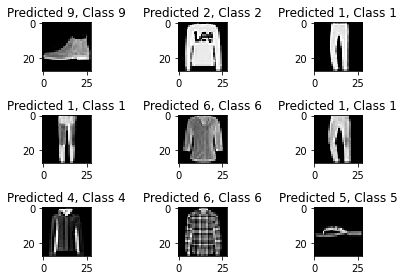

In [30]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 955 incorrect labels


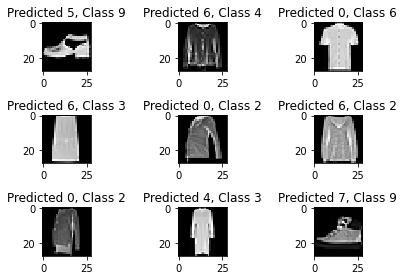

In [31]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [32]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.75      0.89      0.82      1000
     Class 1       1.00      0.97      0.98      1000
     Class 2       0.89      0.80      0.84      1000
     Class 3       0.87      0.94      0.91      1000
     Class 4       0.86      0.85      0.85      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.78      0.70      0.74      1000
     Class 7       0.95      0.97      0.96      1000
     Class 8       0.99      0.97      0.98      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

